In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [55]:
df=pd.read_csv('/content/drive/MyDrive/csv database/homepricesdata (1).csv')

In [56]:
df

,area,city,price
0,2600,Pune,550000
1,3000,Mumbai,565000
2,3200,Mumbai,610000
3,3400,Banglore,630000
4,3600,Banglore,680000
5,4000,Pune,725000
6,5000,Pune,856000


In [57]:
df.isnull().sum()

,0
area,0
city,0
price,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   area    7 non-null      int64 
 1   city    7 non-null      object
 2   price   7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 300.0+ bytes


In [59]:
df.describe()

,area,price
count,7.000000,7.000000
mean,3542.857143,659428.571429
std,780.720058,106116.064041
min,2600.000000,550000.000000
25%,3100.000000,587500.000000
50%,3400.000000,630000.000000
75%,3800.000000,702500.000000
max,5000.000000,856000.000000


In [60]:
model=LinearRegression()

In [61]:
X_train=df['area']
y_train=df['price']

In [62]:
model = LinearRegression()
X_train = df['area'].values.reshape(-1, 1)
model.fit(X_train, y_train)

LinearRegression()

In [63]:
model.predict([[3300]])

array([626678.90625])

In [64]:
model.predict([[2600]])

array([532282.8125])

In [65]:
print('mean_squared error',mean_squared_error(y_train,X_train))

mean_squared error 439697645714.2857


In [66]:
print('r2_score',r2_score(y_train,X_train))

r2_score -44.5552740482


In [67]:
y_predict=model.predict(X_train)

In [68]:
y_predict

array([532282.8125, 586223.4375, 613193.75  , 640164.0625, 667134.375 ,
       721075.    , 855926.5625])

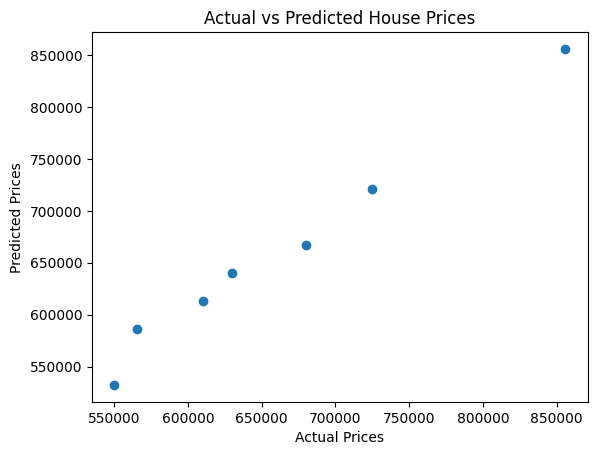

In [69]:
plt.scatter(y_train, y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


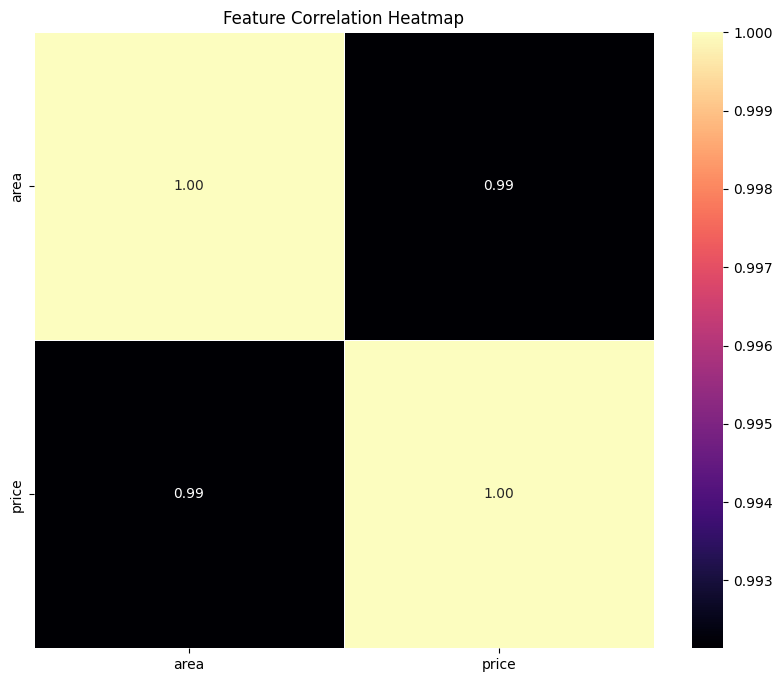

In [70]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [71]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
from sklearn.model_selection import train_test_split

X = df[['area']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to be 2D arrays if they are 1D (for single feature models)
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Retrain the model with the correct X_train and y_train
model = RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)
model.fit(X_train_reshaped, y_train)

y_pred = model.predict(X_test_reshaped)

In [73]:
y_pred


array([620100., 620100.])